In [156]:
#Import Package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc

pd.options.display.max_columns = None

In [157]:
#Import Dataset
df = pd.read_csv('data_hotel_booking_demand.csv')

In [158]:
#Menampilkan 5 baris data
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [159]:
                                                   #Data Understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [115]:
#Terdapat 11 kolom yang tersedia yang memberikan informasi apakah reservasi kamar hotel dibatalkan atau selesai

In [116]:
                                     #Visualize and Dealing Missing Value

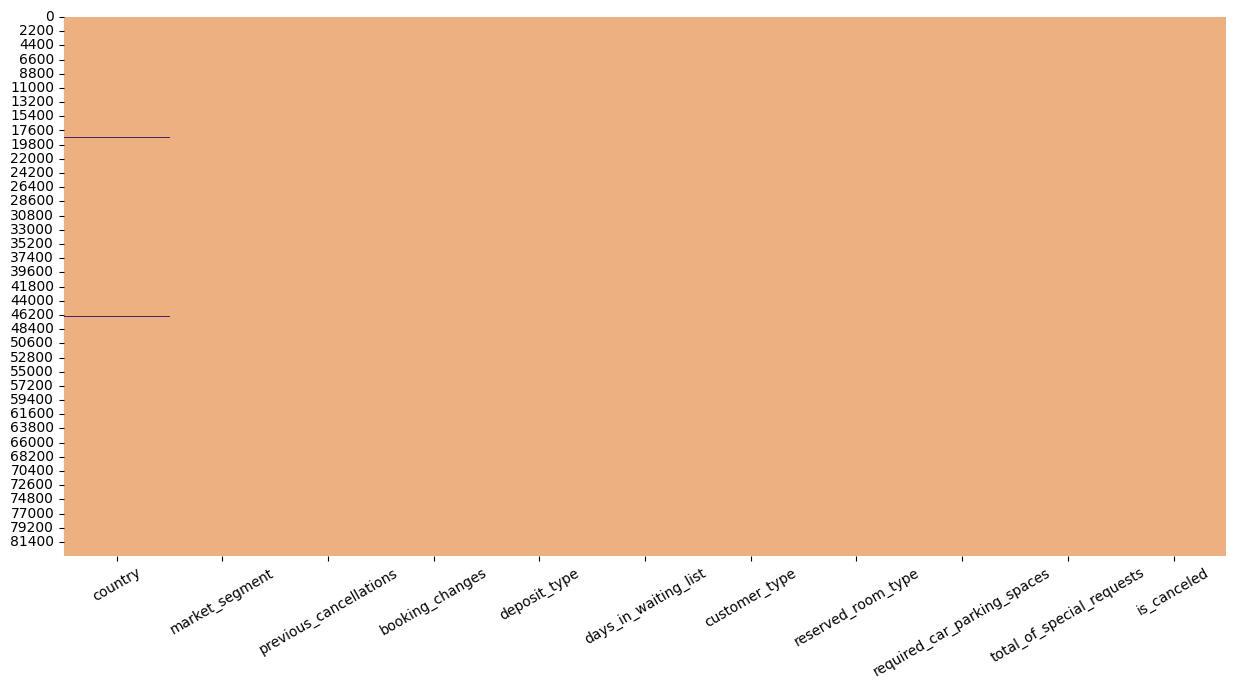

In [160]:
## Visualize Missing Value Using Heatmap
plt.figure(figsize=(15,7)) # set size of heatmap
sns.heatmap(df.isna(), cmap='flare', cbar=False)
# cmap = palette colour of the heatmap
# cbar=False -> to hide heatmap bar (legends) as we will not do analysis from this figure, we only want to detect missing value
plt.xticks(rotation=30) # set degree rotation of the x-axis labels for visualization purposes
plt.show()

In [118]:
#nilai yang hilang terdeteksi hanya di negara kolom (warna ungu menunjukkan nilai yang hilang)

In [161]:
# Handling Missing Value - Fill in missing data with 'Other'
## There should be no customer without being a member of a country, therefore we fill in with 'Other'
df['country'] = df['country'].fillna('Other')

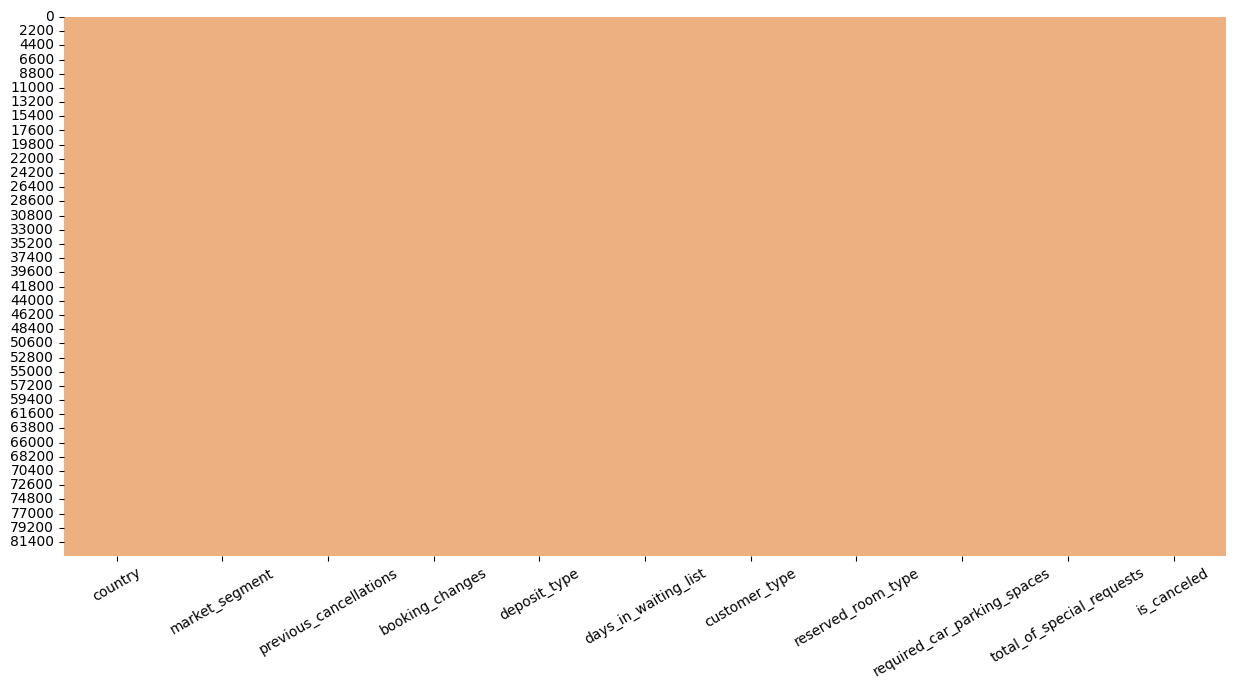

In [162]:
## Confirm Elimination of Missing Value
plt.figure(figsize=(15,7))
sns.heatmap(df.isna(), cmap='flare', cbar=False)
plt.xticks(rotation=30)
plt.show()
## Result: No missing value left in our dataset

In [120]:
                                            #Check Duplicated Data

In [163]:
df.duplicated().any()

True

In [164]:
## Combine duplicate data in a variable and show duplicate data
duplicates = df[df.duplicated() == True]
duplicates

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [165]:
## Build For Loop to contain data for checking column details
hotelDesc=[]

for i in df.columns:
    hotelDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df))*100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
        ])

In [166]:
## Input data into DataFrame and show details of every column
pd.DataFrame(data=hotelDesc,
            columns=[
                'Features',
                'DataType',
                'Null',
                'Null%',
                'Unique',
                'Sample'
            ])

,Features,DataType,Null,Null%,Unique,Sample
0,country,object,0,0.0,163,"[MEX, LCA]"
1,market_segment,object,0,0.0,8,"[Direct, Offline TA/TO]"
2,previous_cancellations,int64,0,0.0,15,"[19, 5]"
3,booking_changes,int64,0,0.0,19,"[15, 9]"
4,deposit_type,object,0,0.0,3,"[Non Refund, No Deposit]"
5,days_in_waiting_list,int64,0,0.0,115,"[20, 73]"
6,customer_type,object,0,0.0,4,"[Transient-Party, Transient]"
7,reserved_room_type,object,0,0.0,10,"[H, G]"
8,required_car_parking_spaces,int64,0,0.0,5,"[2, 0]"
9,total_of_special_requests,int64,0,0.0,6,"[2, 4]"


In [167]:
#Feature Country
df['country'].unique()
## Result: this column consist of country code of our customers.
## We could also confirm that 'Other' value as part of our missin

array(['IRL', 'FRA', 'PRT', 'NLD', 'ESP', 'UMI', 'CN', 'LUX', 'BRA',
       'BEL', 'JPN', 'DEU', 'ITA', 'CHE', 'GBR', 'AGO', 'SRB', 'COL',
       'CHN', 'SWE', 'AUT', 'CIV', 'CZE', 'POL', 'USA', 'SGP', 'RUS',
       'ROU', 'DNK', 'IND', 'MAR', 'PHL', 'ARG', 'ISL', 'ZAF', 'LBN',
       'MOZ', 'TUR', 'BGD', 'MEX', 'CAF', 'NOR', 'FIN', 'UKR', 'EGY',
       'ISR', 'Other', 'KOR', 'AZE', 'HUN', 'AUS', 'EST', 'CHL', 'SVN',
       'PRY', 'ABW', 'ALB', 'LTU', 'ARE', 'HRV', 'SAU', 'NZL', 'LVA',
       'ATA', 'KAZ', 'DZA', 'TWN', 'CRI', 'BIH', 'BGR', 'IRQ', 'OMN',
       'VEN', 'IDN', 'GEO', 'MLT', 'IRN', 'BLR', 'URY', 'LBY', 'TUN',
       'BEN', 'MYS', 'MWI', 'GRC', 'CYP', 'CPV', 'HKG', 'PRI', 'MKD',
       'MUS', 'IMN', 'PAN', 'NGA', 'GLP', 'KHM', 'PER', 'QAT', 'SEN',
       'MAC', 'SVK', 'BHR', 'ECU', 'SYC', 'BOL', 'TJK', 'LCA', 'MDV',
       'SYR', 'ZMB', 'LIE', 'THA', 'MNE', 'BRB', 'CMR', 'JEY', 'GTM',
       'LKA', 'JOR', 'TZA', 'AND', 'ARM', 'GIB', 'VNM', 'PAK', 'JAM',
       'DOM', 'KWT'

In [168]:
## Number of Unique Countries
df['country'].nunique()
## Result: Customers who made bookings on our website came from at least 162 countries.
### From this result, we can assume that hotel in our dataset serve international market and presumably a high-end and luxurious hotel. 

163

In [169]:
(pd.crosstab(index=df['country'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
country,
PRT,40.80
GBR,10.16
FRA,8.74
ESP,7.17
DEU,6.12
ITA,3.18
IRL,2.80
BEL,1.97
BRA,1.86


In [170]:
## Build function for Re-Categorize in `country` column
def country(x):
    if x == 'PRT':
        return x
    else:
        return 'Others'

In [171]:
## Apply Re-Categorize function
df['country'] = df['country'].apply(country)
## Directly perform One-Hot Encoding
df = pd.get_dummies(df, columns=['country'])
## Show Table after Encoding
df.head()
## Result: Original `country` column has been eliminated and encoding result appear at the end of DataFrame

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT
0,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0,1,0
1,Online TA,0,0,No Deposit,0,Transient,A,0,2,0,1,0
2,Online TA,0,1,No Deposit,0,Transient,A,0,2,0,0,1
3,Online TA,0,0,No Deposit,0,Transient,A,0,1,1,1,0
4,Online TA,0,2,No Deposit,0,Transient,A,0,2,0,0,1


In [172]:
#Feature Market
df['market_segment'].unique()

array(['Offline TA/TO', 'Online TA', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'], dtype=object)

In [173]:
(pd.crosstab(index=df['market_segment'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
market_segment,
Online TA,47.22
Offline TA/TO,20.37
Groups,16.42
Direct,10.65
Corporate,4.54
Complementary,0.61
Aviation,0.20
Undefined,0.00


In [174]:
## Build function for Re-Categorize in `market_segment` column
def segment(x):
    if x == 'Online TA':
        return x
    else:
        return 'Others'

In [175]:
## Apply Re-Categorize function
df['market_segment'] = df['market_segment'].apply(segment)
## Directly perform One-Hot Encoding
df = pd.get_dummies(df, columns=['market_segment'])
## Show Table after Encoding
df.head()
## Result: Original `market_segment` column has been eliminated and encoding result appear at the end of DataFrame

,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others
0,0,0,No Deposit,0,Transient-Party,A,0,0,0,1,0,0,1
1,0,0,No Deposit,0,Transient,A,0,2,0,1,0,1,0
2,0,1,No Deposit,0,Transient,A,0,2,0,0,1,1,0
3,0,0,No Deposit,0,Transient,A,0,1,1,1,0,1,0
4,0,2,No Deposit,0,Transient,A,0,2,0,0,1,1,0


In [176]:
#Feature Prev Cancel
df['previous_cancellations'].unique()

array([ 0,  1, 25,  2,  3, 11, 24, 13,  6, 26, 14,  4, 19,  5, 21],
      dtype=int64)

In [177]:
#Feature Booking Change
df['booking_changes'].unique()

array([ 0,  1,  2,  5,  3,  4,  6,  7,  9,  8, 17, 10, 13, 12, 14, 21, 16,
       20, 15], dtype=int64)

In [178]:
#Feature Deposit Type
df['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [179]:
## Directly perform One-Hot Encoding
df = pd.get_dummies(df, columns=['deposit_type'])
## Show Table after Encoding
df.head()
## Result: Original `deposit_type` column has been eliminated and encoding result appear at the end of DataFrame

,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,0,Transient-Party,A,0,0,0,1,0,0,1,1,0,0
1,0,0,0,Transient,A,0,2,0,1,0,1,0,1,0,0
2,0,1,0,Transient,A,0,2,0,0,1,1,0,1,0,0
3,0,0,0,Transient,A,0,1,1,1,0,1,0,1,0,0
4,0,2,0,Transient,A,0,2,0,0,1,1,0,1,0,0


In [180]:
#Feature Days in Waiting List
df['days_in_waiting_list'].unique()

array([  0,   3,  39,  87,  77, 215,  97, 162,  46,  79,   4,  31, 122,
        34,  57, 259,  50,  17,  32,  43,  75,  69,  44,  22, 113,  58,
        38,  65,  48, 236, 176,  25, 108,  91,  19, 160,  68,  28,  63,
        35,  42,  59,  24,   8, 183, 187,  21, 111,  56,  98, 101,  15,
        16,  47,  93,  45,  14,  70,  10,  49, 178,  99,  60,  40,  85,
       223,   6,  33, 391,  20,   1,  41, 147,  55,  80, 379, 150,  61,
       330, 174, 107,  96,  18,  62,  13,  30, 120,  27, 207,  71,   2,
        76, 125,   5,   9, 224,  53,  83,  84,  12,  73, 100,  92,  23,
        11, 105,  26, 193,   7, 165,  74, 121,  36,  64, 185], dtype=int64)

In [181]:
#Feature Customer Type
df['customer_type'].unique()

array(['Transient-Party', 'Transient', 'Contract', 'Group'], dtype=object)

In [182]:
## Directly perform One-Hot Encoding
df = pd.get_dummies(df, columns=['customer_type'])
## Show Table after Encoding
df.head()

,previous_cancellations,booking_changes,days_in_waiting_list,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,0,A,0,0,0,1,0,0,1,1,0,0,0,0,0,1
1,0,0,0,A,0,2,0,1,0,1,0,1,0,0,0,0,1,0
2,0,1,0,A,0,2,0,0,1,1,0,1,0,0,0,0,1,0
3,0,0,0,A,0,1,1,1,0,1,0,1,0,0,0,0,1,0
4,0,2,0,A,0,2,0,0,1,1,0,1,0,0,0,0,1,0


In [183]:
#Feature Reserved Room Type
df['reserved_room_type'].unique()

array(['A', 'E', 'D', 'F', 'B', 'G', 'C', 'H', 'L', 'P'], dtype=object)

In [184]:
## Define reservation made by room type 
(pd.crosstab(index=df['reserved_room_type'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
reserved_room_type,
A,71.84
D,16.18
E,5.56
F,2.44
G,1.73
B,0.94
C,0.81
H,0.48
P,0.01


In [185]:
## Build function for Re-Categorize in `reserved_room_type` column
def room_type(x):
    if x == 'A':
        return x
    else:
        return 'Others'

In [186]:
## Apply Re-Categorize function
df['reserved_room_type'] = df['reserved_room_type'].apply(room_type)
## Directly perform One-Hot Encoding
df = pd.get_dummies(df, columns=['reserved_room_type'])
## Show Table after Encoding
df.head()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_A,reserved_room_type_Others
0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0
1,0,0,0,0,2,0,1,0,1,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0
4,0,2,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0


In [187]:
#Feature Required Car Parking Space
df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3], dtype=int64)

In [188]:
#Feature Total of Special Requests
df['total_of_special_requests'].unique()

array([0, 2, 1, 3, 4, 5], dtype=int64)

In [189]:
#Kolom Target
df['is_canceled'].unique()
## Result: This column define whether customer cancel their bookings or not.
## 0 = Not Cancelled
## 1 = Cancelled

array([0, 1], dtype=int64)

In [190]:
#Update Data Frame
df.head(5)

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_A,reserved_room_type_Others
0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0
1,0,0,0,0,2,0,1,0,1,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0
4,0,2,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0


In [ ]:
                                                    #FEATURE SELECTION

In [191]:
## Impact of Previous Cancellation to Cancellation Status
pd.crosstab(index=df['previous_cancellations'], columns=df['is_canceled'])

is_canceled,0,1
previous_cancellations,,
0,52410,26650
1,238,3969
2,59,27
3,30,16
4,16,3
5,7,0
6,13,6
11,21,7
13,1,9


In [ ]:
#Kolom 0 menunjukkan pemesanan yang tidak dibatalkan oleh pelanggan, sedangkan Kolom 1 berarti pemesanan yang dibatalkan 
oleh pelanggan. Seperti yang bisa kita lihat dari tabel di atas, sebagian besar pelanggan yang akhirnya tidak membatalkan 
pemesanan mereka tidak pernah membatalkan pemesanan sebelumnya. Sedangkan transaksi yang dibatalkan sebagian besar 
dilakukan oleh pelanggan yang tidak pernah melakukan pembatalan dan minimal melakukan 1 kali pembatalan pemesanan terhadap 
pemesanan mereka sebelumnya. Oleh karena itu, pelanggan yang pernah melakukan pembatalan pemesanan memiliki kecenderungan 
untuk melakukan pembatalan lagi di kemudian hari.

In [192]:
# Impact of Booking Changes to Cancellation Status
pd.crosstab(index=df['booking_changes'], columns=df['is_canceled'])

is_canceled,0,1
booking_changes,,
0,42073,28800
1,7676,1287
2,2129,523
3,547,92
4,217,43
5,76,14
6,27,12
7,22,1
8,6,4


In [ ]:
#Kolom 0 menunjukkan pemesanan yang tidak dibatalkan oleh pelanggan, sedangkan Kolom 1 berarti pemesanan yang dibatalkan 
oleh pelanggan. Seperti yang bisa kita lihat dari tabel di atas, sebagian besar pelanggan yang akhirnya tidak membatalkan 
pemesanan mereka telah melakukan perubahan pemesanan sebelumnya. Sedangkan transaksi yang dibatalkan sebagian besar dilakukan 
oleh pelanggan yang sebelumnya jarang melakukan perubahan pemesanan. Oleh karena itu, pelanggan yang biasanya melakukan 
perubahan pemesanan memiliki kecenderungan untuk tidak membatalkan pemesanannya di kemudian hari.

In [193]:
#Impact of Days in Waiting List to Cancellation Status
pd.crosstab(index=df['days_in_waiting_list'], columns=df['is_canceled']).head(10)

is_canceled,0,1
days_in_waiting_list,,
0,51871,29117
1,5,2
2,2,0
3,0,41
4,14,6
5,2,3
6,13,0
7,0,1
8,2,1


In [194]:
pd.crosstab(index=df['days_in_waiting_list'], columns=df['is_canceled']).tail(10)

is_canceled,0,1
days_in_waiting_list,,
193,0,1
207,8,5
215,6,11
223,27,18
224,4,2
236,20,3
259,8,0
330,8,0
379,5,5


In [ ]:
Kolom 0 menunjukkan pemesanan yang tidak dibatalkan oleh pelanggan, sedangkan Kolom 1 berarti pemesanan yang dibatalkan oleh 
pelanggan. Seperti yang bisa kita lihat dari tabel di atas, polanya tidak jelas apakah pelanggan dengan waktu tunggu yang 
singkat untuk kamar atau pelanggan yang telah menunggu hampir setahun akhirnya akan membatalkan pemesanannya atau tidak. 
Namun, secara teoritis jika seseorang telah menunggu lama sebelum mendapatkan kamar, mereka membangun kecenderungan untuk tidak 
membatalkan reservasinya karena sudah lama menunggu kesempatan untuk menginap di hotel. Jika untuk sementara mereka tidak lagi 
tertarik ke kamar, mereka seharusnya membatalkan antrian mereka di daftar tunggu daripada membatalkan pemesanan mereka setelah 
mereka diberi kesempatan untuk memesan.

In [195]:
#Impact of Parking Space Needs to Cancellation Status
pd.crosstab(index=df['required_car_parking_spaces'], columns=df['is_canceled'])

is_canceled,0,1
required_car_parking_spaces,,
0,47568,30778
1,5202,0
2,22,0
3,1,0
8,2,0


In [ ]:
Kolom 0 menunjukkan pemesanan yang tidak dibatalkan oleh pelanggan, sedangkan Kolom 1 berarti pemesanan yang dibatalkan oleh 
pelanggan. Seperti yang dapat kita lihat dari tabel di atas, terlihat jelas bahwa pelanggan yang membutuhkan tempat parkir mobil
sebagai bagian dari reservasi mereka cenderung tidak membatalkan pemesanan mereka dan tidak ada pelanggan yang membatalkan 
pemesanan mereka yang meminta tempat parkir kepada staf hotel.

In [196]:
#Impact of Number of Special Requests to Cancellation Status
pd.crosstab(index=df['total_of_special_requests'], columns=df['is_canceled'])

is_canceled,0,1
total_of_special_requests,,
0,25819,23369
1,18108,5106
2,7153,1967
3,1477,307
4,208,28
5,30,1


In [ ]:
Column 0 indicates bookings that not getting cancelled by customers, while Column 1 means bookings getting cancelled by 
customers. As we could see from the table above, customer that retained their bookings tends to request for any special requests
to the hotel than customer who cancel. This is inline with number of parking space requested above.

In [ ]:
                                                    MACHINE LEARNING MODEL

In [ ]:
1. Association Data

In [197]:
## Import Dython Package for Correlation Ratio Scoring
import dython as dy
from dython.nominal import associations

In [198]:
## Check Data Types of Each Column
df.dtypes
## Our features consist of data in integer and categorical type.

previous_cancellations           int64
booking_changes                  int64
days_in_waiting_list             int64
required_car_parking_spaces      int64
total_of_special_requests        int64
is_canceled                      int64
country_Others                   uint8
country_PRT                      uint8
market_segment_Online TA         uint8
market_segment_Others            uint8
deposit_type_No Deposit          uint8
deposit_type_Non Refund          uint8
deposit_type_Refundable          uint8
customer_type_Contract           uint8
customer_type_Group              uint8
customer_type_Transient          uint8
customer_type_Transient-Party    uint8
reserved_room_type_A             uint8
reserved_room_type_Others        uint8
dtype: object

In [ ]:
1. Split Data

In [200]:
## Define features and target
x=df.drop(columns='is_canceled') ## all columns exclude target column
y=df['is_canceled'] ## target column

In [201]:
# Import Package for splitting data
from sklearn.model_selection import train_test_split

In [202]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.80, random_state=42, stratify=y)
## We split data into 80% training set : 20% testing set

In [203]:
# Check shape of features
print(x_train.shape, x_test.shape)

(66858, 18) (16715, 18)


In [ ]:
2. Base Model With Logistic Regression

In [204]:
## Import Package
from sklearn.linear_model import LogisticRegression

In [205]:
## Build Model
LR = LogisticRegression()

In [206]:
## Fit Model
LR.fit(x_train, y_train)

C:\Users\W 8.1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [207]:
#Cancellation Model
## Import package
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [208]:
## Create Function to perform Evaluation Matrix scoring for Model
def Eva_Matrix(model,x_train,x_test,y_train,y_test,Nama):
    Model=model.fit(x_train,y_train)
    y_pred_train=Model.predict(x_train)
    acc_train=accuracy_score(y_train,y_pred_train)
    rec_train=recall_score(y_train,y_pred_train)
    prec_train=precision_score(y_train,y_pred_train)
    f1_train=f1_score(y_train,y_pred_train)

    y_pred_test=Model.predict(x_test)
    acc_test=accuracy_score(y_test,y_pred_test)
    rec_test=recall_score(y_test,y_pred_test)
    prec_test=precision_score(y_test,y_pred_test)
    f1_test=f1_score(y_test,y_pred_test)
    
    data_LR={
    Nama + ' Training':[acc_train,rec_train,prec_train,f1_train],
    Nama + ' Testing':[acc_test,rec_test,prec_test,f1_test]
}

    df_LR=(pd.DataFrame(data_LR,index=['Accuracy','Recall','Precision','F1']).T).round(4)
    cr_train=classification_report(y_train,y_pred_train)
    cm_train=confusion_matrix(y_train,y_pred_train,labels=[1,0])
    df_train=pd.DataFrame(data=cm_train,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    cr_test=classification_report(y_test,y_pred_test)
    cm_test=confusion_matrix(y_test,y_pred_test,labels=[1,0])
    df_test=pd.DataFrame(data=cm_test,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    return df_LR,cr_train,df_train,cr_test,df_test

## Run Function
df_LR, cr_LR_tr, cm_LR_tr, cr_LR_ts, cm_LR_ts = Eva_Matrix(LR,x_train,x_test,y_train,y_test,'LogReg Base')

C:\Users\W 8.1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [209]:
## Show Evaluation Matrix
df_LR

,Accuracy,Recall,Precision,F1
LogReg Base Training,0.7775,0.5379,0.7912,0.6404
LogReg Base Testing,0.7737,0.5257,0.7897,0.6312


In [210]:
## Show Classification Report
print(cr_LR_tr, cr_LR_ts)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     42236
           1       0.79      0.54      0.64     24622

    accuracy                           0.78     66858
   macro avg       0.78      0.73      0.74     66858
weighted avg       0.78      0.78      0.77     66858
               precision    recall  f1-score   support

           0       0.77      0.92      0.84     10559
           1       0.79      0.53      0.63      6156

    accuracy                           0.77     16715
   macro avg       0.78      0.72      0.73     16715
weighted avg       0.78      0.77      0.76     16715



In [211]:
## Show Confusion Matrix - Testing
cm_LR_ts

,Pred 1,Pred 0
Akt 1,3236,2920
Akt 0,862,9697
